# Lab 1



## Data Manipulation

In this lab, you will learn how to construct a simple machine learning model given a labelled dataset. We will be analysing the Indian Liver Patient Records Dataset, and we will be predicting whether a patient has a liver disease or not. Below you will see that some cells in the notebook contain the commented line *# TODO* for you to add your own code. Try to get this code working yourself and see how you get on. There are many resources on the Web that will help you. Sample code will be provided in an "Answers" version of this notebook at a later date.

## Data Exploration

In this step, we will be analyzing the data given to us. It gives us an idea of what features are important to the determination of liver disease. 

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("data.csv")   # Reading data csv file
labels = data['Dataset']         # Setting the labels
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


As we can see below, there are 9 columns, each with largely different ranges. We can observe that there are a total of 583 data points.

In [3]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [2]:
# Like Describe above other commands for exploring dataset are:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.head(n=3) # By default n is 5. It gives the first n rows.  

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


## Task 1: Querying the dataset

In order to get a certain idea of how the dataset is distributed, we can try querying the dataset.

With Pandas you can do almost anything that you can do in SQL (if you are familiar with SQL, e.g., you have seen this kind of thing in a database course). Commands like groupby, join, concatenation, merging, etc. It is also possible to write subqueries and joins in Pandas. See the following queries for a sort of SQL query. 

In [5]:
no_patients = len(data[(data['Gender']=='Male') & (data['Age']<20)])
# print(data[(data['Gender']=='Male') & (data['Age']<20)])
print("Number of patients who are male and are less than 20 years old: {}"
      .format(no_patients))

Number of patients who are male and are less than 20 years old: 29


Here are some queries for you to practice. Also note the way the print statement with format has been written, which may  be useful in future. 

Q1. Print the number of male patients and number of female patients

In [6]:
#TODO
no_males = len(data[data['Gender'] == 'Male']) #Fill this
no_females = len(data[data['Gender'] == 'Female']) #Fill this

print("Number of male patients: {}".format(no_males))
print("Number of male patients: {}".format(no_females))

Number of male patients: 441
Number of male patients: 142


Q2. Print the number of patients who are older than 50 and have a level of Direct_Bilirubin above 0.5

In [8]:
#TODO
no_patients = len(data[(data['Age'] > 50) & (data['Direct_Bilirubin'] > 0.5)])
print("Number of patients who are older than 50 and have a level of Direct_Bilirubin above 0.5: {}"
      .format(no_patients))

Number of patients who are older than 50 and have a level of Direct_Bilirubin above 0.5: 90


Q3. Print a dataframe of patients who are younger than 32 or have a level of Alkaline_Phosphotase below 200

In [10]:
#TODO
patients = data[(data['Age'] > 32) & (data['Alkaline_Phosphotase'] < 200)]

patients

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
14,61,Male,0.7,0.2,145,53,41,5.8,2.7,0.87,1
17,33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2
29,84,Female,0.7,0.2,188,13,21,6.0,3.2,1.10,2
30,57,Male,4.0,1.9,190,45,111,5.2,1.5,0.40,1
31,52,Male,0.9,0.2,156,35,44,4.9,2.9,1.40,1
32,57,Male,1.0,0.3,187,19,23,5.2,2.9,1.20,2


Feel free to try out some other queries here. The way above queries have been written try something out on the same lines :

In [11]:
#TODO
patients = data[(data['Age'] > 32) & (data['Aspartate_Aminotransferase'] < 30)]
patients

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
17,33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2
20,51,Male,2.2,1.0,610,17,28,7.3,2.6,0.55,1
29,84,Female,0.7,0.2,188,13,21,6.0,3.2,1.10,2
32,57,Male,1.0,0.3,187,19,23,5.2,2.9,1.20,2
44,85,Female,1.0,0.3,208,17,15,7.0,3.6,1.00,2
50,45,Female,0.7,0.2,170,21,14,5.7,2.5,0.70,1
51,34,Female,0.6,0.1,161,15,19,6.6,3.4,1.00,1


## Task 2: Data Visualization

Sometimes querying isn't enough, and you need to see the data laid out to understand more. Seaborn is a library which is a wrapper over matplotlib and is extremely convenient to use. For example, the below plot shows a box plot of alkaline_phosphotase of all patients.

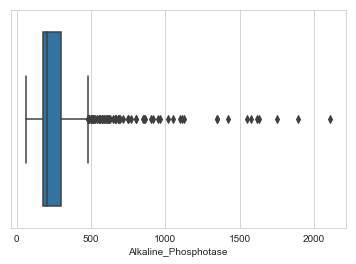

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

sns.boxplot(x=data['Alkaline_Phosphotase']) #Box plot

plt.show()

Q4. Using seaborn, plot a scatter plot between Age and Total_Protiens (note that this is mispelled in the dataset).

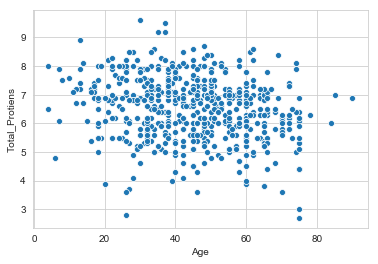

In [17]:
#TODO
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.scatterplot(x=data['Age'], y = data['Total_Protiens'])
# plt.scatter(x=data['Age'], y = data['Total_Protiens'])
plt.show()

Q5. Plot a grouped bar chart comparing the Alamine_Aminotransferase levels of patients with liver disease and patients without liver disease, categorized by gender. (Hint: Use the hue property of barplot for gender, and check this out: https://seaborn.pydata.org/generated/seaborn.barplot.html)

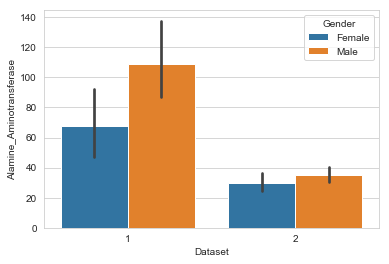

In [24]:
#TODO
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.barplot(x='Dataset', y='Alamine_Aminotransferase', hue = 'Gender', data = data)
plt.show()

Let's view the correlation heatmap for the different features for some more inspiration. 

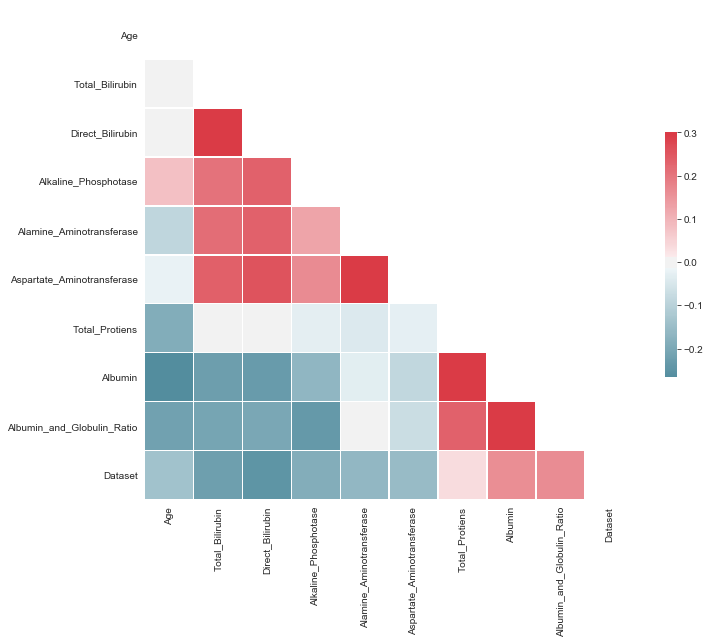

In [25]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Q6. You can try out any other plots here:

In [27]:
#TODO

plt.show()

## Feature Selection and Scaling

According to the knowledge that we've gathered above, let's decide on the best features that we should include for creating a model. Using the knowledge that you have about dimensionality and feature selection, pick an appropriate number of features for the dataset. There is no right or wrong here.

## Task 3: Feature Selection

Q7. Make a reduced dataset new_data by selecting only relevant columns from the original dataframe.

In [30]:
#TODO 

new_data = data['Alamine_Aminotransferase']

new_data.head()

0    16
1    64
2    60
3    14
4    27
Name: Alamine_Aminotransferase, dtype: int64

## Task 4: Create Training and Validation Data Split

Q8. Create training and validation split on data. Check out train_test_split() function from sklearn to do this.

In [35]:
from sklearn.model_selection import train_test_split

#TODO
X_train,X_val,y_train,y_val = train_test_split(data['Alkaline_Phosphotase'], data['Dataset'], test_size=0.33)

# print(X_train)
# print(y_val)

## Task 5: Feature Scaling

We always scale the features after splitting the dataset because we want to ensure that the validation data is isolated. This is because the validation data acts as new, unseen data. Any transformation on it will reduce its validity.

Q9. Although there are many methods to scale data, let's use MinMaxScaler from sklearn. Scale the training data.

In [63]:
from sklearn.preprocessing import MinMaxScaler

#TODO
# x_test = np.array
scaler = MinMaxScaler()            #Instantiate the scaler
scaled_X_train = scaler.fit_transform([data['Albumin'], data['Dataset'], data['Alkaline_Phosphotase'], data['Aspartate_Aminotransferase']])    #Fit and transform the data

scaled_X_train

array([[0.01236559, 0.00315186, 0.00470348, ..., 0.00901639, 0.01311475,
        0.01121495],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.09139785, 0.14183381, 0.13701431, ..., 0.19672131, 0.16939891,
        0.10280374]])

## Task 6: Model Creation

Now we are finally ready to create a model and train it. Remember that this is a two-class classification problem. We need to select a classifier, not a regressor. Let's analyze two simple models, DecisionTreeClassifier and Gaussian Naive Bayes Classifier. We will cover both of these models in more depth later on in the course, for now, have a read of the following articles that give explanations of how to implement both models in scikitlearn:

Decision Trees: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

Naive Bayes: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

Q10. Instantiate and train a DecisionTreeClassifier on the given data

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
#TODO
figure = ['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']
label = ['Dataset']
x = data[figure]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
X_train = SimpleImputer().fit_transform(X_train)
X_test = SimpleImputer().fit_transform(X_test)
y_test = SimpleImputer().fit_transform(y_test)
y_train = SimpleImputer().fit_transform(y_train)
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_dt.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
#Instantiate a DecisionTreeClassifier model and fit it to the training data using fit function

Accuracy: 0.6914285714285714


Q11. Instantiate and train a GaussianNB on the given data

In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
#TODO
figure = ['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']
label = ['Dataset']
x = data[figure]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
X_train = SimpleImputer().fit_transform(X_train)
X_test = SimpleImputer().fit_transform(X_test)
y_test = SimpleImputer().fit_transform(y_test)
y_train = SimpleImputer().fit_transform(y_train)
#Create a Gaussian Classifier
clf_nb = GaussianNB()
# Train the model using the training sets
clf_nb = clf_nb.fit(X_train,y_train)
#Instantiate a DecisionTreeClassifier model and fit it to the training data using fit function
y_pred = clf_dt.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9142857142857143


C:\Users\zhanghao\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Evaluation

These models are now capable of 'predicting' whether a patient has liver disease or not. But we need to evaluate their performance. Since it is a two-class classification problem, we can use accuracy. However, let us also use some additional metrics for better analysis, precision,recall, and f1score.

## Task 7: Performance Metrics

Q12. Using the accuracy_score function, determine the accuracy of the two classifiers.

In [ ]:
from sklearn.metrics import accuracy_score
#TODO
scaled_X_val = None                  #Fit and transform the validation set using the MinMaxScaler

y_pred_dt = clf_dt.predict(scaled_X_val)
y_pred_nb = clf_nb.predict(scaled_X_val)                      

#Use accuracy score and determine accuracy of both classifiers
acc_dt = None                            
acc_nb = None

print("The accuracy of Decision Tree: {} %".format(acc_dt))
print("The accuracy of Gaussian Naive Bayes: {} %".format(acc_nb))

Q13. Determine the precision and recall using precision_score and recall_score.

In [ ]:
from sklearn.metrics import precision_score,recall_score
#TODO
prec_dt = None
prec_nb = None

recall_dt = None
recall_nb = None

print("The precision of Decision Tree: {} %".format(prec_dt))
print("The precision of Gaussian Naive Bayes: {} %".format(prec_nb))
print("The recall of Decision Tree: {} %".format(recall_dt))
print("The recall of Gaussian Naive Bayes: {} %".format(recall_nb))

Q14. Determine the F1-score of the two classifiers.

In [ ]:
from sklearn.metrics import f1_score

f1_dt = None
f1_nb = None

print("The F1-score of Decision Tree: {} %".format(f1_dt))
print("The F1-score of Gaussian Naive Bayes: {} %".format(f1_nb))

We have officially solved a machine learning problem. However, the question of making an effective model is still in question.Try to get the f1 score of any of the classifiers to 85%. Try to use some other scalers if need be. You can experiment with some other data cleaning techniques like outlier removal. You can try using other classifiers, but remember that in the end, no matter how good the classifier, if the data quality sucks, the performance will not be optimum.